<a href="https://colab.research.google.com/github/zinchyO/Tapia-Anderson_DataminingProject.ipynb/blob/main/Tapia_Anderson_DataminingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Storm Event Predictions** *Keonte' Anderson - Adrian Tapia*
Data source:
https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00510/html#

#PREPROCESSING THE DATA
part 1 preprocessing


we are doing this:

1.Regression Models
Damage Estimation: Predict the estimated property and crop damage in monetary terms based on event characteristics.

Injury and Fatality Prediction: Estimate the number of injuries or fatalities resulting from a storm event.

2. Time Series Analysis
Trend Analysis: Analyze trends over time to predict the frequency of certain types of weather events in the future.

Seasonal Forecasting: Use historical data to forecast weather patterns for upcoming seasons.

In [ ]:
# 1 load data from csv files
import pandas as pd
import os
import glob
# Define the path to the directory containing the CSV files
data_dir = "/content"

# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(data_dir, "*.csv"))
# Print the number of CSV files found
print(f"Found {len(csv_files)} CSV files in {data_dir}")

# Create an empty list to store the dataframes
# content
data_frame = pd.DataFrame()
content = []

for i, file in enumerate(csv_files):
    try:
        print(f"Sample of file {file}:")
        df = pd.read_csv(file, encoding='latin-1', nrows=1)
        print(df.head())
    except Exception as e:
        print(f"Could not preview file {file}: {e}")

details_files = [f for f in csv_files if "details" in f.lower()]
locations_files = [f for f in csv_files if "locations" in f.lower()]
fatalities_files = [f for f in csv_files if "fatalities" in f.lower()]


Found 15 CSV files in /content
Sample of file /content/StormEvents_fatalities-ftp_v1.0_d1996_c20220425.csv:
   FAT_YEARMONTH  FAT_DAY  FAT_TIME  FATALITY_ID  EVENT_ID FATALITY_TYPE  \
0         199601        5         0      1001409   5556653             D   

         FATALITY_DATE  FATALITY_AGE FATALITY_SEX FATALITY_LOCATION  \
0  01/05/1996 12:00:00            19            M             Other   

   EVENT_YEARMONTH  
0           199601  
Sample of file /content/StormEvents_locations-ftp_v1.0_d1997_c20220425.csv:
   YEARMONTH  EPISODE_ID  EVENT_ID  LOCATION_INDEX  RANGE  AZIMUTH  LOCATION  \
0     199702     2059155   5590910               1    NaN      NaN       NaN   

   LATITUDE  LONGITUDE  LAT2  LON2  
0       NaN        NaN   NaN   NaN  
Sample of file /content/StormEvents_fatalities-ftp_v1.0_d1998_c20220425.csv:
   FAT_YEARMONTH  FAT_DAY  FAT_TIME  FATALITY_ID  EVENT_ID FATALITY_TYPE  \
0         199803       31         0      1002613   5655515             D   

         FATA

In [ ]:
# Function to load and combine files of the same type
def load_and_combine(files, file_type):
    combined = []
    for i, file in enumerate(files):
        try:
            print(f"Processing {file_type} file {i + 1}/{len(files)}: {file}")
            df = pd.read_csv(file, encoding='latin-1', low_memory=False)
            combined.append(df)
        except Exception as e:
            print(f"Error loading {file}: {e}")
    return pd.concat(combined, ignore_index=True) if combined else pd.DataFrame()

# Combine each type
details_df = load_and_combine(details_files, "details")
locations_df = load_and_combine(locations_files, "locations")
fatalities_df = load_and_combine(fatalities_files, "fatalities")

# Merge dataframes on EVENT_ID
merged_df = details_df.merge(locations_df, on='EVENT_ID', how='outer')
merged_df = merged_df.merge(fatalities_df, on='EVENT_ID', how='outer')

print("Sample of merged dataframe:")
print(merged_df.head())

# Check for missing EVENT_IDs
if merged_df['EVENT_ID'].isna().any():
    print("Warning: Some rows have missing EVENT_IDs.")


Processing details file 1/5: /content/StormEvents_details-ftp_v1.0_d1999_c20220425.csv
Processing details file 2/5: /content/StormEvents_details-ftp_v1.0_d2000_c20220425.csv
Processing details file 3/5: /content/StormEvents_details-ftp_v1.0_d1996_c20220425.csv
Processing details file 4/5: /content/StormEvents_details-ftp_v1.0_d1998_c20220425.csv
Processing details file 5/5: /content/StormEvents_details-ftp_v1.0_d1997_c20220425.csv
Processing locations file 1/5: /content/StormEvents_locations-ftp_v1.0_d1997_c20220425.csv
Processing locations file 2/5: /content/StormEvents_locations-ftp_v1.0_d2000_c20220425.csv
Processing locations file 3/5: /content/StormEvents_locations-ftp_v1.0_d1999_c20220425.csv
Processing locations file 4/5: /content/StormEvents_locations-ftp_v1.0_d1996_c20220425.csv
Processing locations file 5/5: /content/StormEvents_locations-ftp_v1.0_d1998_c20220425.csv
Processing fatalities file 1/5: /content/StormEvents_fatalities-ftp_v1.0_d1996_c20220425.csv
Processing fatali

In [ ]:
print(merged_df.isnull().sum())

BEGIN_YEARMONTH          21
BEGIN_DAY                21
BEGIN_TIME               21
END_YEARMONTH            21
END_DAY                  21
                      ...  
FATALITY_DATE        239772
FATALITY_AGE         239919
FATALITY_SEX         239831
FATALITY_LOCATION    239772
EVENT_YEARMONTH      239772
Length: 71, dtype: int64


In [ ]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243026 entries, 0 to 243025
Data columns (total 71 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BEGIN_YEARMONTH     243005 non-null  float64
 1   BEGIN_DAY           243005 non-null  float64
 2   BEGIN_TIME          243005 non-null  float64
 3   END_YEARMONTH       243005 non-null  float64
 4   END_DAY             243005 non-null  float64
 5   END_TIME            243005 non-null  float64
 6   EPISODE_ID_x        243002 non-null  float64
 7   EVENT_ID            243026 non-null  int64  
 8   STATE               243005 non-null  object 
 9   STATE_FIPS          243005 non-null  float64
 10  YEAR                243005 non-null  float64
 11  MONTH_NAME          243005 non-null  object 
 12  EVENT_TYPE          243005 non-null  object 
 13  CZ_TYPE             243005 non-null  object 
 14  CZ_FIPS             243005 non-null  float64
 15  CZ_NAME             243005 non-nul

In [ ]:
#drop unessesary columns
print("Dropping unessesary columns: ")
drop_columns = [
    'EPISODE_NARRATIVE', 'FATALITY_TYPE', 'LAT2', 'LON2', 'LOCATION', 'FAT_YEARMONTH',
    'FATALITY_DATE', 'FATALITY_AGE', 'FATALITY_SEX', 'FATALITY_LOCATION', 'END_DATE_TIME',
    'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'FAT_DAY', 'FAT_TIME', 'AZIMUTH','CZ_NAME', 'WFO','END_TIME',
    'EVENT_NARRATIVE', 'STATE_FIPS', 'YEAR','MONTH_NAME','CZ_TYPE','CZ_FIPS','BEGIN_DATE_TIME',
    'CZ_TIMEZONE','END_DATE_TIME', 'SOURCE', 'CATEGORY','TOR_LENGTH','TOR_WIDTH', 'TOR_OTHER_WFO',
    'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH',
    'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'END_LAT', 'END_LON', 'DATA_SOURCE',
    'LOCATION_INDEX', 'EPISODE_ID_y','EPISODE_ID_x','BEGIN_TIME','FATALITY_ID','EVENT_YEARMONTH'
]
merged_df.drop(columns=drop_columns, inplace=True)
print(f"Dataframe after dropping columns: " )
print(merged_df.info())
# maybe need maybe not: FATALITY_ID, '', RANGE,
# columns that could be linked somehow if not already by the event_iD:
# 'YEARMONTH' and EVENT_YEARMONTH and FAT_YEARMONTH,


Dropping unessesary columns: 
Dataframe after dropping columns: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243026 entries, 0 to 243025
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BEGIN_YEARMONTH    243005 non-null  float64
 1   BEGIN_DAY          243005 non-null  float64
 2   END_YEARMONTH      243005 non-null  float64
 3   END_DAY            243005 non-null  float64
 4   EVENT_ID           243026 non-null  int64  
 5   STATE              243005 non-null  object 
 6   EVENT_TYPE         243005 non-null  object 
 7   INJURIES_DIRECT    243005 non-null  float64
 8   INJURIES_INDIRECT  243005 non-null  float64
 9   DEATHS_DIRECT      243005 non-null  float64
 10  DEATHS_INDIRECT    243005 non-null  float64
 11  DAMAGE_PROPERTY    71665 non-null   object 
 12  DAMAGE_CROPS       23996 non-null   object 
 13  MAGNITUDE          98503 non-null   float64
 14  MAGNITUDE_TYPE     10129 non-null  

In [ ]:
print(merged_df.describe(include='all'))


        BEGIN_YEARMONTH      BEGIN_DAY  END_YEARMONTH        END_DAY  \
count     243005.000000  243005.000000  243005.000000  243005.000000   
unique              NaN            NaN            NaN            NaN   
top                 NaN            NaN            NaN            NaN   
freq                NaN            NaN            NaN            NaN   
mean      199812.041773      14.928738  199812.049238      16.437913   
std          143.482582       9.087198     143.478527       9.099477   
min       199601.000000       1.000000  199601.000000       1.000000   
25%       199704.000000       7.000000  199704.000000       8.000000   
50%       199806.000000      15.000000  199806.000000      17.000000   
75%       199909.000000      23.000000  199909.000000      24.000000   
max       200012.000000      31.000000  200101.000000      31.000000   

            EVENT_ID   STATE         EVENT_TYPE  INJURIES_DIRECT  \
count   2.430260e+05  243005             243005    243005.000000   

In [ ]:
print(merged_df.isna().sum())


BEGIN_YEARMONTH          21
BEGIN_DAY                21
END_YEARMONTH            21
END_DAY                  21
EVENT_ID                  0
STATE                    21
EVENT_TYPE               21
INJURIES_DIRECT          21
INJURIES_INDIRECT        21
DEATHS_DIRECT            21
DEATHS_INDIRECT          21
DAMAGE_PROPERTY      171361
DAMAGE_CROPS         219030
MAGNITUDE            144523
MAGNITUDE_TYPE       232897
FLOOD_CAUSE          243026
TOR_F_SCALE          235596
BEGIN_LAT            125561
BEGIN_LON            125563
YEARMONTH                24
RANGE                196272
LATITUDE             125566
LONGITUDE            125566
dtype: int64


In [ ]:
print(merged_df.nunique())

BEGIN_YEARMONTH          60
BEGIN_DAY                31
END_YEARMONTH            61
END_DAY                  31
EVENT_ID             239922
STATE                    57
EVENT_TYPE               41
INJURIES_DIRECT          91
INJURIES_INDIRECT         1
DEATHS_DIRECT            26
DEATHS_INDIRECT           1
DAMAGE_PROPERTY         783
DAMAGE_CROPS            470
MAGNITUDE               190
MAGNITUDE_TYPE            3
FLOOD_CAUSE               0
TOR_F_SCALE               6
BEGIN_LAT              2336
BEGIN_LON              4683
YEARMONTH                60
RANGE                    64
LATITUDE               2338
LONGITUDE              4711
dtype: int64


In [ ]:
print(merged_df.isnull().sum())

BEGIN_YEARMONTH          21
BEGIN_DAY                21
END_YEARMONTH            21
END_DAY                  21
EVENT_ID                  0
STATE                    21
EVENT_TYPE               21
INJURIES_DIRECT          21
INJURIES_INDIRECT        21
DEATHS_DIRECT            21
DEATHS_INDIRECT          21
DAMAGE_PROPERTY      171361
DAMAGE_CROPS         219030
MAGNITUDE            144523
MAGNITUDE_TYPE       232897
FLOOD_CAUSE          243026
TOR_F_SCALE          235596
BEGIN_LAT            125561
BEGIN_LON            125563
YEARMONTH                24
RANGE                196272
LATITUDE             125566
LONGITUDE            125566
dtype: int64


In [ ]:
output_dir = "/content/sample_data"
output_path = os.path.join(output_dir, "combined_storm_data.csv")
merged_df.to_csv(output_path, index=False)
print(f"all csv into 1 file of data saved to {output_path}")
# don't run it yet makes a 2.5 gb csv file

all csv into 1 file of data saved to /content/sample_data/combined_storm_data.csv


In [ ]:
# Drop rows with empty values in specified columns
columns_to_check = ['BEGIN_YEARMONTH', 'BEGIN_DAY',
                    'END_YEARMONTH', 'END_DAY', 'EVENT_TYPE',
                    'INJURIES_DIRECT', 'INJURIES_INDIRECT',
                    'DEATHS_DIRECT', 'DEATHS_INDIRECT','STATE']
merged_df.dropna(subset=columns_to_check, inplace=True)
print(merged_df.isnull().sum())

BEGIN_YEARMONTH           0
BEGIN_DAY                 0
END_YEARMONTH             0
END_DAY                   0
EVENT_ID                  0
STATE                     0
EVENT_TYPE                0
INJURIES_DIRECT           0
INJURIES_INDIRECT         0
DEATHS_DIRECT             0
DEATHS_INDIRECT           0
DAMAGE_PROPERTY      171340
DAMAGE_CROPS         219009
MAGNITUDE            144502
MAGNITUDE_TYPE       232876
FLOOD_CAUSE          243005
TOR_F_SCALE          235575
BEGIN_LAT            125540
BEGIN_LON            125542
YEARMONTH                 3
RANGE                196251
LATITUDE             125545
LONGITUDE            125545
dtype: int64


In [ ]:
# Data preparation (continued from the given code)
print("Converting DAMAGE_PROPERTY and DAMAGE_CROPS to numeric values...")
def convert_damage_to_numeric(value):
    if pd.isna(value) or value.strip() == '':
        return 0.0  # Treat empty or missing values as 0.0

    if isinstance(value, str):
        value = value.strip()
        try:
            if value == 'K':  # Single multiplier
                return 1e3
            elif value == 'M':  # Single multiplier
                return 1e6
            elif value == 'B':  # Single multiplier
                return 1e9
            elif 'K' in value:
                return float(value.replace('K', '').strip()) * 1e3
            elif 'M' in value:
                return float(value.replace('M', '').strip()) * 1e6
            elif 'B' in value:
                return float(value.replace('B', '').strip()) * 1e9
            elif 'T' in value:  # Assuming T = Trillion
                return float(value.replace('T', '').strip()) * 1e12
            elif value.replace('.', '', 1).isdigit():  # Handles plain numeric strings
                return float(value)
        except ValueError:
            print(f"Unexpected format in value: {value}")
            return 0.0  # Log and treat as 0.0 for unexpected strings

    # Handle numeric values directly
    return float(value) if isinstance(value, (int, float)) else 0.0

merged_df['DAMAGE_PROPERTY'] = merged_df['DAMAGE_PROPERTY'].apply(convert_damage_to_numeric)
merged_df['DAMAGE_CROPS'] = merged_df['DAMAGE_CROPS'].apply(convert_damage_to_numeric)
print("Summary after conversion and fill:")
print(merged_df[['DAMAGE_PROPERTY', 'DAMAGE_CROPS']].describe())


Converting DAMAGE_PROPERTY and DAMAGE_CROPS to numeric values...
Summary after conversion and fill:
       DAMAGE_PROPERTY  DAMAGE_CROPS
count     2.430050e+05  2.430050e+05
mean      2.949730e+05  6.192795e+04
std       1.167172e+07  3.097262e+06
min       0.000000e+00  0.000000e+00
25%       0.000000e+00  0.000000e+00
50%       0.000000e+00  0.000000e+00
75%       1.000000e+02  0.000000e+00
max       3.000000e+09  5.150000e+08


In [ ]:
# Feature engineering
print("Creating additional features...")
merged_df['TOTAL_DAMAGE'] = merged_df['DAMAGE_PROPERTY'] + merged_df['DAMAGE_CROPS']
merged_df['TOTAL_INJURIES'] = merged_df['INJURIES_DIRECT'] + merged_df['INJURIES_INDIRECT']
merged_df['TOTAL_FATALITIES'] = merged_df['DEATHS_DIRECT'] + merged_df['DEATHS_INDIRECT']

Creating additional features...


In [ ]:
import numpy as np
# use nan to replace empty magnitude columns
# Fill magnitude for relevant event types with 0.0
merged_df['MAGNITUDE'] = merged_df['MAGNITUDE'].fillna(np.nan)
print(merged_df.isnull().sum())

BEGIN_YEARMONTH           0
BEGIN_DAY                 0
END_YEARMONTH             0
END_DAY                   0
EVENT_ID                  0
STATE                     0
EVENT_TYPE                0
INJURIES_DIRECT           0
INJURIES_INDIRECT         0
DEATHS_DIRECT             0
DEATHS_INDIRECT           0
DAMAGE_PROPERTY           0
DAMAGE_CROPS              0
MAGNITUDE            144502
MAGNITUDE_TYPE       232876
FLOOD_CAUSE          243005
TOR_F_SCALE          235575
BEGIN_LAT            125540
BEGIN_LON            125542
YEARMONTH                 3
RANGE                196251
LATITUDE             125545
LONGITUDE            125545
TOTAL_DAMAGE              0
TOTAL_INJURIES            0
TOTAL_FATALITIES          0
dtype: int64


# models SUCH AS REGRESSION AND TIME SERIES ANALYSIS


In [ ]:
#original before trying to fix mse
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# Drop rows with missing critical values
print("Dropping rows with missing critical values...")
critical_columns = ['EVENT_TYPE', 'BEGIN_YEARMONTH', 'TOTAL_DAMAGE', 'TOTAL_INJURIES', 'TOTAL_FATALITIES']
merged_df.dropna(subset=critical_columns, inplace=True)

# Regression Model: Damage Estimation
print("Building regression models for damage estimation...")
#X_damage = merged_df[['MAGNITUDE', 'BEGIN_YEARMONTH', 'EVENT_TYPE']]
#X_damage = pd.get_dummies(X_damage, columns=['EVENT_TYPE'], drop_first=True)

# Prepare features and target variable
X_damage = merged_df[['EVENT_TYPE', 'BEGIN_YEARMONTH', 'TOTAL_INJURIES', 'TOTAL_FATALITIES', 'MAGNITUDE', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS']]
X_damage = pd.get_dummies(X_damage, columns=['EVENT_TYPE'], drop_first=True)
y_damage = merged_df['TOTAL_DAMAGE']

X_train, X_test, y_train, y_test = train_test_split(X_damage, y_damage, test_size=0.2, random_state=42)

model_damage = RandomForestRegressor(random_state=42)
model_damage.fit(X_train, y_train)

y_pred_damage = model_damage.predict(X_test)

print("Damage Estimation Model Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_damage))
print("R^2:", r2_score(y_test, y_pred_damage))

Dropping rows with missing critical values...
Building regression models for damage estimation...
Damage Estimation Model Performance:
MSE: 22958807155558.26
R^2: 0.8038249990108797


In [ ]:
# Regression Model: Injury Prediction
print("Building regression models for injury prediction...")
X_injury = merged_df[['TOTAL_DAMAGE', 'BEGIN_YEARMONTH', 'EVENT_TYPE']]
X_injury = pd.get_dummies(X_injury, columns=['EVENT_TYPE'], drop_first=True)

y_injury = merged_df['TOTAL_INJURIES']

X_train, X_test, y_train, y_test = train_test_split(X_injury, y_injury, test_size=0.2, random_state=42)

model_injury = RandomForestRegressor(random_state=42)
model_injury.fit(X_train, y_train)

y_pred_injury = model_injury.predict(X_test)

print("Injury Prediction Model Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_injury))
print("R^2:", r2_score(y_test, y_pred_injury))

Building regression models for injury prediction...
Injury Prediction Model Performance:
MSE: 0.23064451015690057
R^2: 0.1476616661202479


Performing time series analysis for trend analysis...


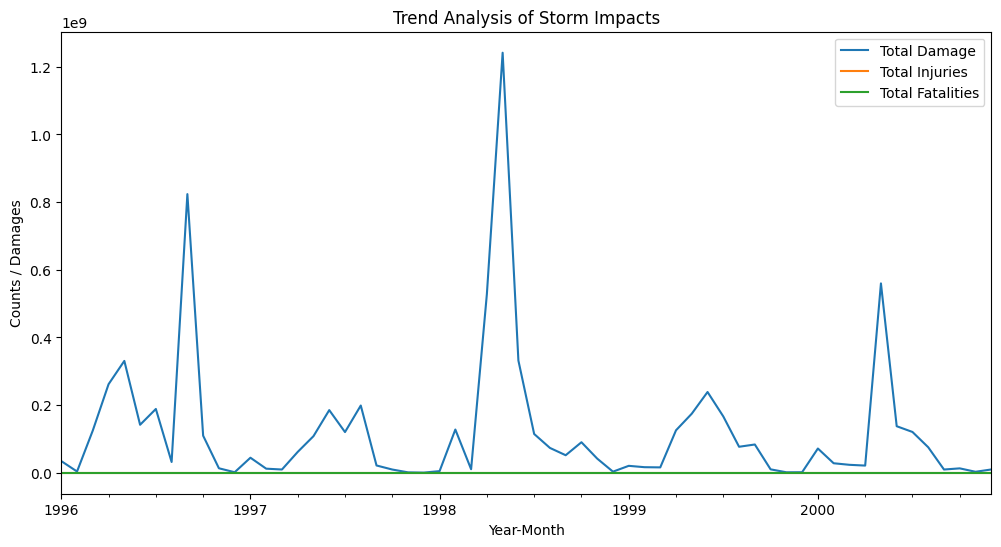

In [ ]:
# Time Series Analysis: Trend Analysis
print("Performing time series analysis for trend analysis...")
time_series_df = merged_df.groupby('BEGIN_YEARMONTH').agg({'TOTAL_DAMAGE': 'sum', 'TOTAL_INJURIES': 'sum', 'TOTAL_FATALITIES': 'sum'}).reset_index()

time_series_df['BEGIN_YEARMONTH'] = pd.to_datetime(time_series_df['BEGIN_YEARMONTH'], format='%Y%m')
time_series_df.set_index('BEGIN_YEARMONTH', inplace=True)
# Plot trends
plt.figure(figsize=(12, 6))
time_series_df['TOTAL_DAMAGE'].plot(label='Total Damage', legend=True)
time_series_df['TOTAL_INJURIES'].plot(label='Total Injuries', legend=True)
time_series_df['TOTAL_FATALITIES'].plot(label='Total Fatalities', legend=True)
plt.title('Trend Analysis of Storm Impacts')
plt.xlabel('Year-Month')
plt.ylabel('Counts / Damages')
plt.show()

Performing seasonal forecasting...


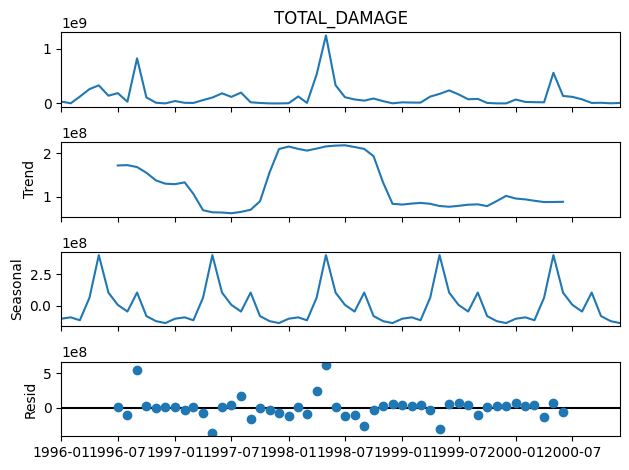

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


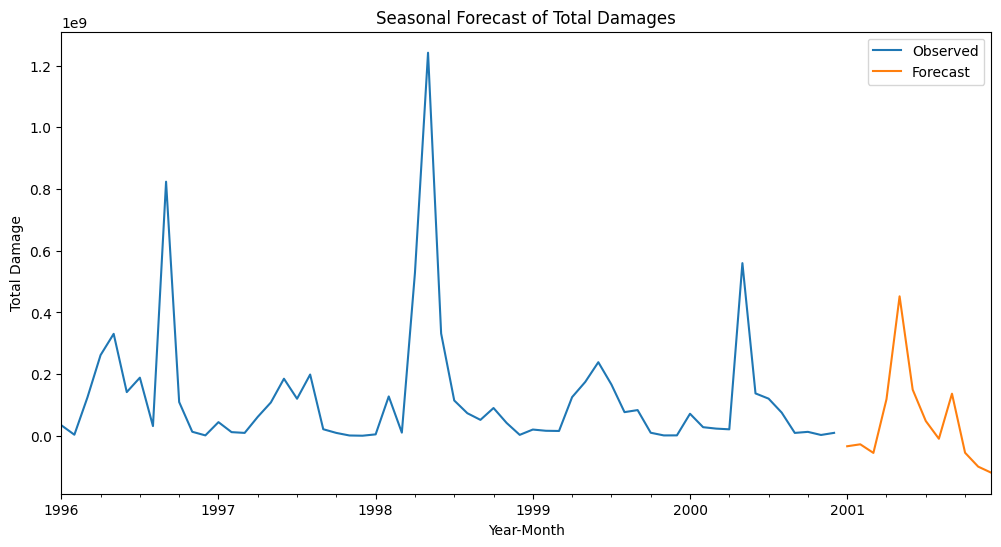

Analysis complete.


In [ ]:
# Seasonal Forecasting
print("Performing seasonal forecasting...")
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Decompose the time series
result = seasonal_decompose(time_series_df['TOTAL_DAMAGE'], model='additive', period=12)
result.plot()
plt.show()

# Forecast using Holt-Winters method
model_forecast = ExponentialSmoothing(time_series_df['TOTAL_DAMAGE'], seasonal='add', trend='add', seasonal_periods=12)
forecast_fit = model_forecast.fit()
forecast = forecast_fit.forecast(12)

plt.figure(figsize=(12, 6))
time_series_df['TOTAL_DAMAGE'].plot(label='Observed', legend=True)
forecast.plot(label='Forecast', legend=True)
plt.title('Seasonal Forecast of Total Damages')
plt.xlabel('Year-Month')
plt.ylabel('Total Damage')
plt.show()

print("Analysis complete.")

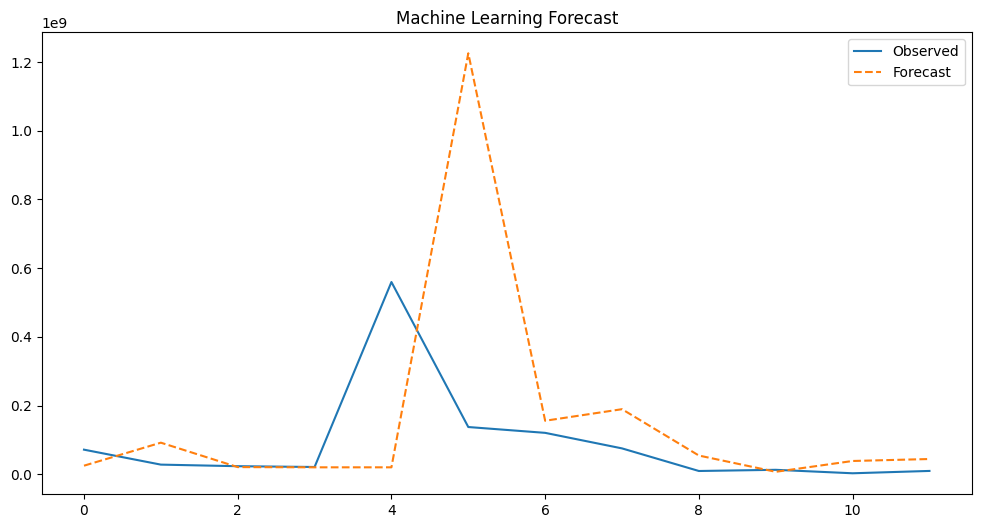

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Create lag features
time_series_df['Lag1'] = time_series_df['TOTAL_DAMAGE'].shift(1)
time_series_df['Lag2'] = time_series_df['TOTAL_DAMAGE'].shift(2)
time_series_df.dropna(inplace=True)

# Define features and target
X = time_series_df[['Lag1', 'Lag2']]
y = time_series_df['TOTAL_DAMAGE']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
forecast = model.predict(X_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Observed')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('Machine Learning Forecast')
plt.show()


# New Section

In [ ]:
# ---- PART 3: Save Cleaned Data ----
# Save the cleaned dataframe to a new CSV file
output_dir = "/content/sample_data"
output_path = os.path.join(output_dir, "cleaned_storm_data.csv")
data_frame.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")

Cleaned data saved to /content/sample_data/cleaned_storm_data.csv


In [ ]:
# view the dataframe
print(merged_df.info())
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 281568 entries, 2 to 575359
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BEGIN_YEARMONTH    281568 non-null  float64
 1   BEGIN_DAY          281568 non-null  float64
 2   END_YEARMONTH      281568 non-null  float64
 3   END_DAY            281568 non-null  float64
 4   EVENT_ID           281568 non-null  int64  
 5   STATE              281568 non-null  object 
 6   EVENT_TYPE         281568 non-null  object 
 7   INJURIES_DIRECT    281568 non-null  float64
 8   INJURIES_INDIRECT  281568 non-null  float64
 9   DEATHS_DIRECT      281568 non-null  float64
 10  DEATHS_INDIRECT    281568 non-null  float64
 11  DAMAGE_PROPERTY    281568 non-null  float64
 12  DAMAGE_CROPS       281568 non-null  float64
 13  MAGNITUDE          281568 non-null  float64
 14  MAGNITUDE_TYPE     106415 non-null  object 
 15  FLOOD_CAUSE        0 non-null       object 
 16  TOR_F_S

# ALL CODE BLOCKS COMBINED INTO ONE
all the code in 1 big block for
 debuging


In [ ]:
# 1 load data from csv files
import pandas as pd
import os
import glob
# Define the path to the directory containing the CSV files
data_dir = "/content"

# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(data_dir, "*.csv"))
# Print the number of CSV files found
print(f"Found {len(csv_files)} CSV files in {data_dir}")

# Create an empty list to store the dataframes
# content
data_frame = pd.DataFrame()
content = []

for i, file in enumerate(csv_files):
    try:
        print(f"Sample of file {file}:")
        df = pd.read_csv(file, encoding='latin-1', nrows=1)
        print(df.head())
    except Exception as e:
        print(f"Could not preview file {file}: {e}")

details_files = [f for f in csv_files if "details" in f.lower()]
locations_files = [f for f in csv_files if "locations" in f.lower()]
fatalities_files = [f for f in csv_files if "fatalities" in f.lower()]
# Function to load and combine files of the same type
def load_and_combine(files, file_type):
    combined = []
    for i, file in enumerate(files):
        try:
            print(f"Processing {file_type} file {i + 1}/{len(files)}: {file}")
            df = pd.read_csv(file, encoding='latin-1', low_memory=False)
            combined.append(df)
        except Exception as e:
            print(f"Error loading {file}: {e}")
    return pd.concat(combined, ignore_index=True) if combined else pd.DataFrame()

# Combine each type
details_df = load_and_combine(details_files, "details")
locations_df = load_and_combine(locations_files, "locations")
fatalities_df = load_and_combine(fatalities_files, "fatalities")

# Merge dataframes on EVENT_ID
merged_df = details_df.merge(locations_df, on='EVENT_ID', how='outer')
merged_df = merged_df.merge(fatalities_df, on='EVENT_ID', how='outer')

print("Sample of merged dataframe:")
print(merged_df.head())

# Check for missing EVENT_IDs
if merged_df['EVENT_ID'].isna().any():
    print("Warning: Some rows have missing EVENT_IDs.")
print(merged_df.isnull().sum())
print(merged_df.info())
#drop unessesary columns
print("Dropping unessesary columns: ")
drop_columns = [
    'EPISODE_NARRATIVE', 'FATALITY_TYPE', 'LAT2', 'LON2', 'LOCATION', 'FAT_YEARMONTH',
    'FATALITY_DATE', 'FATALITY_AGE', 'FATALITY_SEX', 'FATALITY_LOCATION', 'END_DATE_TIME',
    'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'FAT_DAY', 'FAT_TIME', 'AZIMUTH','CZ_NAME', 'WFO','END_TIME',
    'EVENT_NARRATIVE', 'STATE_FIPS', 'YEAR','MONTH_NAME','CZ_TYPE','CZ_FIPS','BEGIN_DATE_TIME',
    'CZ_TIMEZONE','END_DATE_TIME', 'SOURCE', 'CATEGORY','TOR_LENGTH','TOR_WIDTH', 'TOR_OTHER_WFO',
    'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH',
    'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'END_LAT', 'END_LON', 'DATA_SOURCE',
    'LOCATION_INDEX', 'EPISODE_ID_y','EPISODE_ID_x','BEGIN_TIME','FATALITY_ID','EVENT_YEARMONTH'
]
merged_df.drop(columns=drop_columns, inplace=True)
print(f"Dataframe after dropping columns: " )
print(merged_df.info())
# maybe need maybe not: FATALITY_ID, '', RANGE,
# columns that could be linked somehow if not already by the event_iD:
# 'YEARMONTH' and EVENT_YEARMONTH and FAT_YEARMONTH,
print(merged_df.describe(include='all'))
print(merged_df.isna().sum())
print(merged_df.isnull().sum())
print(merged_df.nunique())
output_dir = "/content/sample_data"
output_path = os.path.join(output_dir, "combined_storm_data.csv")
merged_df.to_csv(output_path, index=False)
print(f"all csv into 1 file of data saved to {output_path}")
# don't run it yet makes a 2.5 gb csv file
# Drop rows with empty values in specified columns
columns_to_check = ['BEGIN_YEARMONTH', 'BEGIN_DAY',
                    'END_YEARMONTH', 'END_DAY', 'EVENT_TYPE',
                    'INJURIES_DIRECT', 'INJURIES_INDIRECT',
                    'DEATHS_DIRECT', 'DEATHS_INDIRECT','STATE']
merged_df.dropna(subset=columns_to_check, inplace=True)
print(merged_df.isnull().sum())
# Data preparation (continued from the given code)
print("Converting DAMAGE_PROPERTY and DAMAGE_CROPS to numeric values...")
def convert_damage_to_numeric(value):
    if pd.isna(value) or value.strip() == '':
        return 0.0  # Treat empty or missing values as 0.0

    if isinstance(value, str):
        value = value.strip()
        try:
            if value == 'K':  # Single multiplier
                return 1e3
            elif value == 'M':  # Single multiplier
                return 1e6
            elif value == 'B':  # Single multiplier
                return 1e9
            elif 'K' in value:
                return float(value.replace('K', '').strip()) * 1e3
            elif 'M' in value:
                return float(value.replace('M', '').strip()) * 1e6
            elif 'B' in value:
                return float(value.replace('B', '').strip()) * 1e9
            elif 'T' in value:  # Assuming T = Trillion
                return float(value.replace('T', '').strip()) * 1e12
            elif value.replace('.', '', 1).isdigit():  # Handles plain numeric strings
                return float(value)
        except ValueError:
            print(f"Unexpected format in value: {value}")
            return 0.0  # Log and treat as 0.0 for unexpected strings

    # Handle numeric values directly
    return float(value) if isinstance(value, (int, float)) else 0.0

merged_df['DAMAGE_PROPERTY'] = merged_df['DAMAGE_PROPERTY'].apply(convert_damage_to_numeric)
merged_df['DAMAGE_CROPS'] = merged_df['DAMAGE_CROPS'].apply(convert_damage_to_numeric)
print("Summary after conversion and fill:")
print(merged_df[['DAMAGE_PROPERTY', 'DAMAGE_CROPS']].describe())
# Feature engineering
print("Creating additional features...")
merged_df['TOTAL_DAMAGE'] = merged_df['DAMAGE_PROPERTY'] + merged_df['DAMAGE_CROPS']
merged_df['TOTAL_INJURIES'] = merged_df['INJURIES_DIRECT'] + merged_df['INJURIES_INDIRECT']
merged_df['TOTAL_FATALITIES'] = merged_df['DEATHS_DIRECT'] + merged_df['DEATHS_INDIRECT']
import numpy as np
# use nan to replace empty magnitude columns
# Fill magnitude for relevant event types with 0.0
merged_df['MAGNITUDE'] = merged_df['MAGNITUDE'].fillna(np.nan)
print(merged_df.isnull().sum())
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# Drop rows with missing critical values
print("Dropping rows with missing critical values...")
#critical_columns = ['EVENT_TYPE', 'BEGIN_YEARMONTH', 'TOTAL_DAMAGE', 'TOTAL_INJURIES', 'TOTAL_FATALITIES']
#merged_df.dropna(subset=critical_columns, inplace=True)

# Regression Model: Damage Estimation
print("Building regression models for damage estimation...")
#X_damage = merged_df[['MAGNITUDE', 'BEGIN_YEARMONTH', 'EVENT_TYPE']]
#X_damage = pd.get_dummies(X_damage, columns=['EVENT_TYPE'], drop_first=True)

# Prepare features and target variable
X_damage = merged_df[['EVENT_TYPE', 'BEGIN_YEARMONTH', 'TOTAL_INJURIES', 'TOTAL_FATALITIES', 'MAGNITUDE', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS']]
X_damage = pd.get_dummies(X_damage, columns=['EVENT_TYPE'], drop_first=True)
y_damage = merged_df['TOTAL_DAMAGE']

X_train, X_test, y_train, y_test = train_test_split(X_damage, y_damage, test_size=0.2, random_state=42)

model_damage = RandomForestRegressor(random_state=42)
model_damage.fit(X_train, y_train)

y_pred_damage = model_damage.predict(X_test)

print("Damage Estimation Model Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_damage))
print("R^2:", r2_score(y_test, y_pred_damage))
# Regression Model: Injury and Fatality Prediction
print("Building regression models for injury and fatality prediction...")
X_injury = merged_df[['TOTAL_DAMAGE', 'BEGIN_YEARMONTH', 'EVENT_TYPE']]
X_injury = pd.get_dummies(X_injury, columns=['EVENT_TYPE'], drop_first=True)

y_injury = merged_df['TOTAL_INJURIES']

X_train, X_test, y_train, y_test = train_test_split(X_injury, y_injury, test_size=0.2, random_state=42)

model_injury = RandomForestRegressor(random_state=42)
model_injury.fit(X_train, y_train)

y_pred_injury = model_injury.predict(X_test)

print("Injury Prediction Model Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_injury))
print("R^2:", r2_score(y_test, y_pred_injury))
# Time Series Analysis: Trend Analysis
print("Performing time series analysis for trend analysis...")
time_series_df = merged_df.groupby('BEGIN_YEARMONTH').agg({'TOTAL_DAMAGE': 'sum', 'TOTAL_INJURIES': 'sum', 'TOTAL_FATALITIES': 'sum'}).reset_index()

time_series_df['BEGIN_YEARMONTH'] = pd.to_datetime(time_series_df['BEGIN_YEARMONTH'], format='%Y%m')
time_series_df.set_index('BEGIN_YEARMONTH', inplace=True)
# Plot trends
plt.figure(figsize=(12, 6))
time_series_df['TOTAL_DAMAGE'].plot(label='Total Damage', legend=True)
time_series_df['TOTAL_INJURIES'].plot(label='Total Injuries', legend=True)
time_series_df['TOTAL_FATALITIES'].plot(label='Total Fatalities', legend=True)
plt.title('Trend Analysis of Storm Impacts')
plt.xlabel('Year-Month')
plt.ylabel('Counts / Damages')
plt.show()
# Seasonal Forecasting
print("Performing seasonal forecasting...")
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Decompose the time series
result = seasonal_decompose(time_series_df['TOTAL_DAMAGE'], model='additive', period=12)
result.plot()
plt.show()

# Forecast using Holt-Winters method
model_forecast = ExponentialSmoothing(time_series_df['TOTAL_DAMAGE'], seasonal='add', trend='add', seasonal_periods=12)
forecast_fit = model_forecast.fit()
forecast = forecast_fit.forecast(12)

plt.figure(figsize=(12, 6))
time_series_df['TOTAL_DAMAGE'].plot(label='Observed', legend=True)
forecast.plot(label='Forecast', legend=True)
plt.title('Seasonal Forecast of Total Damages')
plt.xlabel('Year-Month')
plt.ylabel('Total Damage')
plt.show()

print("Analysis complete.")

Found 87 CSV files in /content
Sample of file /content/StormEvents_fatalities-ftp_v1.0_d2005_c20220425.csv:
   FAT_YEARMONTH  FAT_DAY  FAT_TIME  FATALITY_ID  EVENT_ID FATALITY_TYPE  \
0         200503        6         0        21018   5445472             D   

         FATALITY_DATE  FATALITY_AGE FATALITY_SEX FATALITY_LOCATION  \
0  03/06/2005 12:00:00            32            M             Other   

   EVENT_YEARMONTH  
0           200503  
Sample of file /content/StormEvents_locations-ftp_v1.0_d2024_c20241121.csv:
   YEARMONTH  EPISODE_ID  EVENT_ID  LOCATION_INDEX  RANGE AZIMUTH    LOCATION  \
0     202404      188809   1161227               1    0.9      SW  HAPPY TOWN   

   LATITUDE  LONGITUDE     LAT2    LON2  
0     33.99     -81.09  3359400  815400  
Sample of file /content/StormEvents_details-ftp_v1.0_d2018_c20240716.csv:
   BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  END_TIME  \
0           201806          6        1810         201806        6      1810   

ValueError: could not convert string to float: ''

In [ ]:
#